# CNN for MNIST dataset

In [1]:
# First import all important libraries for the network class
import numpy as np
# Import TensorFlow
import tensorflow as tf
# Import matplotlib so we can look at the data
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

### Get the MNIST data

In [2]:
# Get the MNIST dataset from scikit learn

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)

# Define the features and the labels
X, y = mnist['data'], np.asfarray(mnist['target'])

3.0

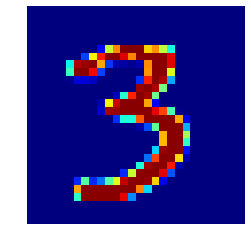

In [25]:
# Define some index, get the corresponding image, and plot it
some_index = 10000
some_digit = X[some_index]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap=cm.jet, interpolation='nearest')
plt.axis('off')

# Check the label/
y[some_index]

In [41]:
# Define the training and test set
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Shuffle the training set to make sure training goes smooth
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [43]:
#Reshape the data into 2D data (or 3D with 1 color channel)

X_train = X_train/255
X_Traindata = X_train.reshape((X_train.shape[0], 28, 28, 1))

X_test = X_test/255
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [16]:
#b = np.ones(784).reshape(28,28)
X_Traindata = np.pad(X_Traindata, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_test = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')

### Designing a CNN with Keras

Following the LeNet-5 architecture with Convolutional and Average Pooling Layers.

In [1]:
## Parameters for CNN
n_fmaps = 6
n_fmaps2 = 16
#n_fmaps3 = 120

npix = 28
learning_rate = 0.1

In [47]:
#LeNet-5

cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(n_fmaps, kernel_size=5, padding='same', activation='relu', input_shape=(npix,npix,1)))
cnn.add(tf.keras.layers.AveragePooling2D(pool_size=2, strides=2, padding='valid'))
cnn.add(tf.keras.layers.Activation('relu'))
        
cnn.add(tf.keras.layers.Conv2D(n_fmaps2, kernel_size=5, activation='relu', padding='valid'))
cnn.add(tf.keras.layers.AveragePooling2D(pool_size=2, strides=2, padding='valid'))
cnn.add(tf.keras.layers.Activation('relu'))
        
#cnn.add(tf.keras.layers.Conv2D(n_fmaps3, kernel_size=5, activation='relu', padding='valid'))
#cnn.add(tf.keras.layers.Activation('relu'))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=120, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=84, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1, activation = 'softmax'))
        
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_2 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_3 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
activation_3 (Activation)    (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
__________

In [2]:
## Compiling the model. Using different loss functions and optimizers.
sgd  = tf.keras.optimizers.SGD(lr=learning_rate)
cnn.compile(loss='mean_squared_error', optimizer=sgd , metrics=['accuracy'])

NameError: name 'tf' is not defined

In [50]:
# Transform label into array of categories using one-hot encoding
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat  = tf.keras.utils.to_categorical(y_test, 10)

In [52]:
#Fit the model
cnn.fit(X_Traindata, y_train, epochs=5 ,batch_size=128 , verbose=1)

Epoch 1/5
60000/60000 [==============================] - 24s 407us/step - loss: 20.2774 - acc: 0.1124
Epoch 2/5
60000/60000 [==============================] - 26s 432us/step - loss: 20.2774 - acc: 0.1124
Epoch 3/5
60000/60000 [==============================] - 30s 501us/step - loss: 20.2774 - acc: 0.1124
Epoch 4/5
60000/60000 [==============================] - 30s 493us/step - loss: 20.2774 - acc: 0.1124
Epoch 5/5
60000/60000 [==============================] - 31s 520us/step - loss: 20.2774 - acc: 0.1124


In [13]:
#Evaluate model and compute the score

score = cnn.evaluate(X_test, y_test_cat,verbose=1)
print (score[1])

10000/10000 [==============================] - 2s 208us/step
0.9373


In [168]:
# Compute the network prediction for the test sample
network_output  = cnn.predict(X_test)

In [178]:
# Checking the predictions for some examples
# Define some index, get the corresponding label
some_index = 11
target_label = np.int64(y_test[some_index])

# Query the network for the predicted label
predicted_label = np.argmax(network_output[some_index])
print('True label:',target_label,' - Predicted label:',predicted_label)

True label: 6  - Predicted label: 6


In [15]:
## Trying a different architecture
n_fmaps = 6
n_fmaps2 = 16
n_fmaps3 = 120

npix = 28
learning_rate = 0.1

In [16]:
# New CNN
cnn2 = tf.keras.models.Sequential()

cnn2.add(tf.keras.layers.Conv2D(n_fmaps, kernel_size=5, padding='same', activation='relu', input_shape=(npix,npix,1)))
cnn2.add(tf.keras.layers.AveragePooling2D(pool_size=2, strides=2, padding='valid'))
cnn2.add(tf.keras.layers.Activation('relu'))
        
cnn2.add(tf.keras.layers.Conv2D(n_fmaps2, kernel_size=5, activation='relu', padding='valid'))
cnn2.add(tf.keras.layers.AveragePooling2D(pool_size=2, strides=2, padding='valid'))
cnn2.add(tf.keras.layers.Activation('relu'))
        
cnn2.add(tf.keras.layers.Conv2D(n_fmaps3, kernel_size=5, activation='relu', padding='valid'))
cnn2.add(tf.keras.layers.Activation('relu'))

cnn2.add(tf.keras.layers.Flatten())

cnn2.add(tf.keras.layers.Dense(units=120, activation='relu'))
cnn2.add(tf.keras.layers.Dense(units=84, activation='relu'))
cnn2.add(tf.keras.layers.Dense(units=10, activation = 'softmax'))
        
cnn2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_4 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
activation_4 (Activation)    (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_5 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
activation_5 (Activation)    (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 1, 1, 120)         48120     
__________

In [17]:
sgd  = tf.keras.optimizers.SGD(lr=learning_rate)
cnn2.compile(loss='mean_squared_error', optimizer=sgd , metrics=['accuracy'])

In [18]:
#Fit the model
cnn2.fit(X_Traindata, y_train_cat, epochs=10 ,batch_size=128 , verbose=1)

Epoch 1/10
60000/60000 [==============================] - 24s 408us/step - loss: 0.0899 - acc: 0.2060
Epoch 2/10
60000/60000 [==============================] - 25s 420us/step - loss: 0.0898 - acc: 0.2398
Epoch 3/10
60000/60000 [==============================] - 30s 501us/step - loss: 0.0897 - acc: 0.2645
Epoch 4/10
60000/60000 [==============================] - 30s 497us/step - loss: 0.0895 - acc: 0.3332
Epoch 5/10
60000/60000 [==============================] - 30s 496us/step - loss: 0.0890 - acc: 0.4216
Epoch 6/10
60000/60000 [==============================] - 30s 499us/step - loss: 0.0875 - acc: 0.4412
Epoch 7/10
60000/60000 [==============================] - 30s 502us/step - loss: 0.0704 - acc: 0.53700s - loss: 0.0709 - a
Epoch 8/10
60000/60000 [==============================] - 30s 495us/step - loss: 0.0283 - acc: 0.8243
Epoch 9/10
60000/60000 [==============================] - 30s 496us/step - loss: 0.0194 - acc: 0.8728
Epoch 10/10
60000/60000 [==============================] - 31

In [19]:
score2 = cnn2.evaluate(X_test, y_test_cat,verbose=1)
print (score2[1])

10000/10000 [==============================] - 2s 214us/step
0.9058


In [20]:
# Trying new optimizer
adam = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [21]:
cnn3 = tf.keras.models.Sequential()

cnn3.add(tf.keras.layers.Conv2D(n_fmaps, kernel_size=5, padding='same', activation='relu', input_shape=(npix,npix,1)))
cnn3.add(tf.keras.layers.AveragePooling2D(pool_size=2, strides=2, padding='valid'))
cnn3.add(tf.keras.layers.Activation('relu'))
        
cnn3.add(tf.keras.layers.Conv2D(n_fmaps2, kernel_size=5, activation='relu', padding='valid'))
cnn3.add(tf.keras.layers.AveragePooling2D(pool_size=2, strides=2, padding='valid'))
cnn3.add(tf.keras.layers.Activation('relu'))

cnn3.add(tf.keras.layers.Flatten())

cnn3.add(tf.keras.layers.Dense(units=120, activation='relu'))
cnn3.add(tf.keras.layers.Dense(units=84, activation='relu'))
cnn3.add(tf.keras.layers.Dense(units=10, activation = 'softmax'))
        
cnn3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_6 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
activation_7 (Activation)    (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_7 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
activation_8 (Activation)    (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
__________

In [22]:
cnn3.compile(loss='mean_squared_error', optimizer=adam , metrics=['accuracy'])

In [23]:
cnn3.fit(X_Traindata, y_train_cat, epochs=10 ,batch_size=128 , verbose=1)

Epoch 1/10
60000/60000 [==============================] - 24s 401us/step - loss: 0.0172 - acc: 0.8816
Epoch 2/10
60000/60000 [==============================] - 30s 500us/step - loss: 0.0052 - acc: 0.96631s - loss: 0.0053 - a - ETA: 0s - loss: 0.0053 - acc:
Epoch 3/10
60000/60000 [==============================] - 30s 497us/step - loss: 0.0036 - acc: 0.9772
Epoch 4/10
60000/60000 [==============================] - 30s 504us/step - loss: 0.0029 - acc: 0.9813
Epoch 5/10
60000/60000 [==============================] - 29s 487us/step - loss: 0.0025 - acc: 0.9839
Epoch 6/10
60000/60000 [==============================] - 29s 487us/step - loss: 0.0021 - acc: 0.9867
Epoch 7/10
60000/60000 [==============================] - 29s 484us/step - loss: 0.0019 - acc: 0.9881
Epoch 8/10
60000/60000 [==============================] - 29s 484us/step - loss: 0.0017 - acc: 0.9896
Epoch 9/10
60000/60000 [==============================] - 29s 484us/step - loss: 0.0015 - acc: 0.9909
Epoch 10/10
60000/60000 [====

In [26]:
score3 = cnn3.evaluate(X_test, y_test_cat,verbose=1)
print (score3[1])

10000/10000 [==============================] - 2s 219us/step
0.9892


In [27]:
cnn4 = tf.keras.models.Sequential()

cnn4.add(tf.keras.layers.Conv2D(n_fmaps, kernel_size=5, padding='same', activation='relu', input_shape=(npix,npix,1)))
cnn4.add(tf.keras.layers.AveragePooling2D(pool_size=2, strides=2, padding='valid'))
cnn4.add(tf.keras.layers.Activation('relu'))
        
cnn4.add(tf.keras.layers.Conv2D(n_fmaps2, kernel_size=5, activation='relu', padding='valid'))
cnn4.add(tf.keras.layers.AveragePooling2D(pool_size=2, strides=2, padding='valid'))
cnn4.add(tf.keras.layers.Activation('relu'))

cnn4.add(tf.keras.layers.Flatten())

cnn4.add(tf.keras.layers.Dense(units=120, activation='relu'))
cnn4.add(tf.keras.layers.Dense(units=84, activation='relu'))
cnn4.add(tf.keras.layers.Dense(units=10, activation = 'softmax'))
        
cnn4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_8 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
activation_9 (Activation)    (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_9 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
activation_10 (Activation)   (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 400)               0         
__________

In [30]:
cnn4.compile(loss='kullback_leibler_divergence', optimizer=adam , metrics=['accuracy'])

In [31]:
cnn4.fit(X_Traindata, y_train_cat, epochs=5 ,batch_size=128 , verbose=1)

Epoch 1/5
60000/60000 [==============================] - 26s 431us/step - loss: 0.1988 - acc: 0.9389
Epoch 2/5
60000/60000 [==============================] - 31s 514us/step - loss: 0.0650 - acc: 0.9795
Epoch 3/5
60000/60000 [==============================] - 30s 499us/step - loss: 0.0479 - acc: 0.9845
Epoch 4/5
60000/60000 [==============================] - 30s 503us/step - loss: 0.0377 - acc: 0.9888
Epoch 5/5
60000/60000 [==============================] - 32s 536us/step - loss: 0.0323 - acc: 0.9896


In [32]:
score4 = cnn4.evaluate(X_test, y_test_cat,verbose=1)
print (score4[1])

10000/10000 [==============================] - 2s 227us/step
0.9857


In [3]:
### As we saw a combination of 'kullback_leibler_divergence' and optimizer adam worked the best.Get the MNIST data